In [1]:
import pandas as pd
import numpy as np
import threading

import random
import re
import math
from collections import Counter

import os

In [2]:
dir = './Dataset/'
path = os.listdir('./Dataset')
path

['negative-words.txt', 'positive-words.txt', 'test', 'train']

In [3]:
f = open(dir + 'positive-words.txt', 'r')
pos_words = f.read().lower().split('\n')
pos_words[:5]

['a+', 'abound', 'abounds', 'abundance', 'abundant']

In [4]:
f = open(dir + 'negative-words.txt', 'r')
neg_words = f.read().lower().split('\n')
neg_words[:5]

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']

In [5]:
print('Negative Words: ',len(neg_words))
print('Positive Words: ',len(pos_words))

Negative Words:  4783
Positive Words:  2006


In [6]:
train_dir = dir + 'train/'
test_dir = dir + 'test/'

In [7]:
pos_train_path = train_dir + 'pos/'
neg_train_path = train_dir + 'neg/'
pos_test_path = test_dir + 'pos/'
neg_test_path = test_dir + 'neg/'

In [8]:
print(len(os.listdir(pos_train_path)))
print(len(os.listdir(neg_train_path)))
print(len(os.listdir(pos_test_path)))
print(len(os.listdir(neg_test_path)))

12500
12500
12500
12500


In [9]:
dict = {}

def makeFrame(PATH, STATUS, THREAD):
    frame = []
    for file in os.listdir(PATH):
        f = open(PATH + file, 'r', encoding="utf8")
        s = f.read()
        exclamation, no_word = 0, 0
        if '!' in s:
            exclamation = 1
        if 'no' in s.split():
            no_word = 1
        s = re.sub('[^A-Za-z0-9\s]+','',s.replace('<br />','').replace('.',' ')).lower().strip().split()
        n_w, n_p = 0, 0
        for w in Counter(s).items():
            if w[0] in neg_words:
                n_w += w[1]
            elif w[0] in pos_words:
                n_p += w[1]
        logCount = math.log(len(s))
        frame.append([int(file.strip('.txt').split('_')[0]), int(file.strip('.txt').split('_')[-1]), s, n_w, n_p, logCount, exclamation, no_word, STATUS])
    dict[THREAD] = frame

In [10]:
try:
    t1 = threading.Thread(target= makeFrame, args=(pos_train_path, 1, '+ve_Train',))
    t2 = threading.Thread(target= makeFrame, args= (neg_train_path, 0, '-ve_Train',))
    t3 = threading.Thread(target= makeFrame, args= (pos_test_path, 1, '+ve_Test',))
    t4 = threading.Thread(target= makeFrame, args= (neg_test_path, 0,'-ve_Test',) )
except:
    print("Error: Unable To Start Thread")

In [11]:
t1.start()
t2.start()
t3.start()
t4.start()

t1.join()
t2.join()
t3.join()
t4.join()
print('Finished All Threads')

Finished All Threads


In [16]:
df_Ptest = pd.DataFrame(dict['+ve_Test'], columns = ['Unique_ID' , 'Rating', 'Text', 'Negative_Words', 'Positive_Words', 'Log_Word_Count', 'Exclamation_Mark', 'No_Word','Status'])
df_Ntest = pd.DataFrame(dict['-ve_Test'], columns = ['Unique_ID' , 'Rating', 'Text', 'Negative_Words', 'Positive_Words', 'Log_Word_Count', 'Exclamation_Mark', 'No_Word','Status'])
df_test_all = pd.concat([df_Ptest, df_Ntest])
display(df_test_all.head(), df_test_all.tail())

,Unique_ID,Rating,Text,Negative_Words,Positive_Words,Log_Word_Count,Exclamation_Mark,No_Word,Status
0,0,10,"[i, went, and, saw, this, movie, last, night, ...",3,4,5.023881,0,0,1
1,10000,7,"[actor, turned, director, bill, paxton, follow...",6,19,5.840642,0,1,1
2,10001,9,"[as, a, recreational, golfer, with, some, know...",9,9,5.484797,0,0,1
3,10002,8,"[i, saw, this, film, in, a, sneak, preview, an...",2,14,4.804021,0,0,1
4,10003,8,"[bill, paxton, has, taken, the, true, story, o...",3,15,5.308268,0,0,1


,Unique_ID,Rating,Text,Negative_Words,Positive_Words,Log_Word_Count,Exclamation_Mark,No_Word,Status
12495,9998,1,"[i, occasionally, let, my, kids, watch, this, ...",11,4,4.644391,0,0,0
12496,9999,1,"[when, all, we, have, anymore, is, pretty, muc...",7,9,5.099866,0,0,0
12497,999,3,"[the, basic, genre, is, a, thriller, intercut,...",9,8,5.575949,0,1,0
12498,99,3,"[four, things, intrigued, me, as, to, this, fi...",6,8,4.836282,0,0,0
12499,9,4,"[david, bryces, comments, nearby, are, excepti...",15,27,5.968708,1,0,0


In [17]:
df_Ptrain = pd.DataFrame(dict['+ve_Train'], columns = ['Unique_ID' , 'Rating', 'Text', 'Negative_Words', 'Positive_Words', 'Log_Word_Count', 'Exclamation_Mark', 'No_Word','Status'])
df_Ntrain = pd.DataFrame(dict['-ve_Train'], columns = ['Unique_ID' , 'Rating', 'Text', 'Negative_Words', 'Positive_Words', 'Log_Word_Count', 'Exclamation_Mark', 'No_Word','Status'])
df_train_all = pd.concat([df_Ptrain, df_Ntrain])
display(df_train_all.head(), df_train_all.tail())

,Unique_ID,Rating,Text,Negative_Words,Positive_Words,Log_Word_Count,Exclamation_Mark,No_Word,Status
0,0,9,"[bromwell, high, is, a, cartoon, comedy, it, r...",5,5,4.927254,1,0,1
1,10000,8,"[homelessness, or, houselessness, as, george, ...",15,17,6.049733,0,0,1
2,10001,10,"[brilliant, overacting, by, lesley, ann, warre...",7,9,4.990433,0,0,1
3,10002,7,"[this, is, easily, the, most, underrated, film...",6,8,4.820282,0,0,1
4,10003,8,"[this, is, not, the, typical, mel, brooks, fil...",2,6,4.787492,0,0,1


,Unique_ID,Rating,Text,Negative_Words,Positive_Words,Log_Word_Count,Exclamation_Mark,No_Word,Status
12495,9998,4,"[towards, the, end, of, the, movie, i, felt, i...",10,12,5.634790,0,0,0
12496,9999,3,"[this, is, the, kind, of, movie, that, my, ene...",7,6,4.997212,1,1,0
12497,999,3,"[i, saw, descent, last, night, at, the, stockh...",14,14,5.659482,1,0,0
12498,99,1,"[some, films, that, you, pick, up, for, a, pou...",17,9,5.424950,0,0,0
12499,9,1,"[this, is, one, of, the, dumbest, films, ive, ...",9,4,4.927254,0,0,0


In [18]:
for i in df_train_all.iloc[12500]['Text']:
    if i in neg_words:
        print(i)

unnatural
pig
absurd
insane
violent
crazy
unfortunately
absurd


In [19]:
df_test = df_test_all.reset_index().drop(columns = ['index','Text','Unique_ID'])
df_test.head()

,Rating,Negative_Words,Positive_Words,Log_Word_Count,Exclamation_Mark,No_Word,Status
0,10,3,4,5.023881,0,0,1
1,7,6,19,5.840642,0,1,1
2,9,9,9,5.484797,0,0,1
3,8,2,14,4.804021,0,0,1
4,8,3,15,5.308268,0,0,1


In [20]:
df_train_original = df_train_all.reset_index().drop(columns = ['index','Text','Unique_ID'])
df_train_original.head()

,Rating,Negative_Words,Positive_Words,Log_Word_Count,Exclamation_Mark,No_Word,Status
0,9,5,5,4.927254,1,0,1
1,8,15,17,6.049733,0,0,1
2,10,7,9,4.990433,0,0,1
3,7,6,8,4.820282,0,0,1
4,8,2,6,4.787492,0,0,1


In [21]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
df_train = shuffle(df_train_original)
df_train

,Rating,Negative_Words,Positive_Words,Log_Word_Count,Exclamation_Mark,No_Word,Status
22441,2,6,5,5.283204,0,0,0
8845,10,16,32,6.595781,1,0,1
4865,10,0,8,4.804021,1,0,1
22149,4,4,7,4.700480,0,0,0
21845,3,6,3,4.804021,0,0,0
...,...,...,...,...,...,...,...
4922,8,9,12,5.365976,0,0,1
15611,1,3,4,3.610918,0,0,0
11953,9,9,10,5.123964,0,0,1
19807,1,4,0,2.890372,0,0,0


In [22]:
Y_Test = df_test[['Status']].to_numpy()
X_Test = df_test[df_test.columns[:-1]].to_numpy()

scaler_test = MinMaxScaler()
X_Test = scaler_test.fit_transform(X_Test)
print(X_Test.shape)
print(Y_Test.shape)

(25000, 6)
(25000, 1)


In [23]:
Y = df_train[['Status']].to_numpy()
X = df_train[df_train.columns[:-1]].to_numpy()

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print(X.shape)
print(Y.shape)

(25000, 6)
(25000, 1)


In [24]:
Y_Test = Y_Test.reshape(-1)
Y = Y.reshape(-1)
print(Y.shape, Y_Test.shape)

(25000,) (25000,)


In [26]:
print(X[:5], Y[:5])
print(X_Test[:5], Y_Test[:5])

[[0.11111111 0.06185567 0.05319149 0.54180671 0.         0.        ]
 [1.         0.16494845 0.34042553 0.78040246 1.         0.        ]
 [1.         0.         0.08510638 0.45470252 1.         0.        ]
 [0.33333333 0.04123711 0.07446809 0.43588124 0.         0.        ]
 [0.22222222 0.06185567 0.03191489 0.45470252 0.         0.        ]] [0 1 1 0 0]
[[1.         0.024      0.04938272 0.5755794  0.         0.        ]
 [0.66666667 0.048      0.2345679  0.70481644 0.         1.        ]
 [0.88888889 0.072      0.11111111 0.64851072 0.         0.        ]
 [0.77777778 0.016      0.17283951 0.54079078 0.         0.        ]
 [0.77777778 0.024      0.18518519 0.6205783  0.         0.        ]] [1 1 1 1 1]


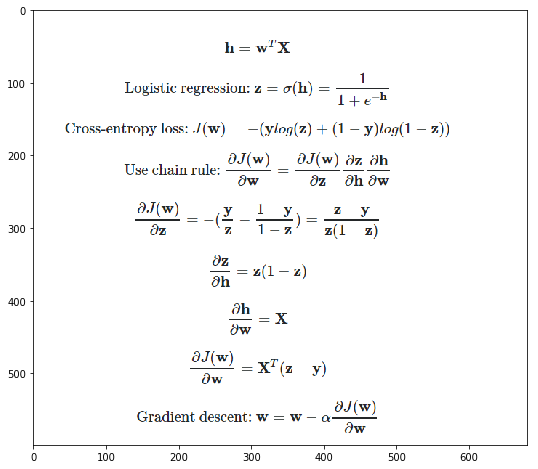

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12,8))
img = mpimg.imread('Cross_Entropy.PNG')
plt.imshow(img)

In [220]:
def sigmoid(Z):
    return 1./(1. + np.exp(-Z))

def cross_entropy_loss(y_pred, y_true):
        return (-(y_true * np.log(y_pred))).sum()/float(len(y_true))
    
def predict(X, W):
    Y_pred = np.dot(X,W)
    Y_pred = sigmoid(Y_pred)
    Y_pred = np.where(Y_pred > 0.5, 1, 0)
    return Y_pred

def evaluation(X_Test, Y_Test, W):
    Y_Pred = predict(X_Test, W)
    Y_A = pd.Series(Y_Test, name='Actual')
    Y_P = pd.Series(Y_Pred, name='Predicted')
    df_confusion = pd.crosstab(Y_P, Y_A, margins=True)
    display(df_confusion)
    
    data_primary = {'True Positives': int(df_confusion[1][1]),
        'True Negatives': df_confusion[0][0],
        'False Positives': df_confusion[0][1],
        'False Negatives': df_confusion[1][0]}

    display(pd.DataFrame.from_dict(data_primary, orient='index', columns = ['Values']))
    
    data_secondary = {
        'Accuracy': (df_confusion[0][0] + df_confusion[1][1])/df_confusion['All']['All'],
        'Precision': df_confusion[1][1]/df_confusion['All'][1],
        'Recall': df_confusion[1][1]/df_confusion[1]['All'],
        'F1-Score': 2*(((df_confusion[1][1]/df_confusion['All'][1])*(df_confusion[1][1]/df_confusion[1]['All']))/((df_confusion[1][1]/df_confusion['All'][1])+(df_confusion[1][1]/df_confusion[1]['All'])))}

    display(pd.DataFrame.from_dict(data_secondary, orient='index', columns = ['Values']))
    
    return df_confusion

In [221]:
n_epoch = 3000
alpha = 0.0001

def gradientDescent(X, Y, alpha, n_epoch, mode = None):
    J = list()  

    W = np.random.normal(0,0.1,X.shape[1])
    if mode == 'BGD':
        for epoch in range(n_epoch):
            theta = W
            Z = np.dot(X,W) # (25000, 6) x (6, 1)
            Y_hat = sigmoid(Z) # (25000,)
            L = Y_hat - Y # (25000,)
            W = theta - ( alpha * np.dot(np.transpose(X),L) ) # (6,25000) x (25000,)

            J.append(cross_entropy_loss(Y_hat, Y))
    elif mode == 'SGD':
        for epoch in range(n_epoch):
            for row in range(len(X)):
                theta = W
                Z = np.dot(X[row],W) # (1, 6) x (6, 1)
                Y_hat = sigmoid(Z) # (1,)
                L = Y_hat - Y[row] # (1,)
                W = theta - (alpha * np.dot(np.transpose(X[row]),L)) # (6,1) x (1,)
#                 W = theta - (alpha * (X[row]*L))
            J.append(cross_entropy_loss(Y_hat, Y))
                
    return W, J

In [222]:
W_BGD, J_BGD = gradientDescent(X ,Y, alpha, n_epoch, mode = 'BGD')

In [226]:
W_SGD, J_SGD = gradientDescent(X ,Y, alpha, n_epoch, mode = 'SGD')

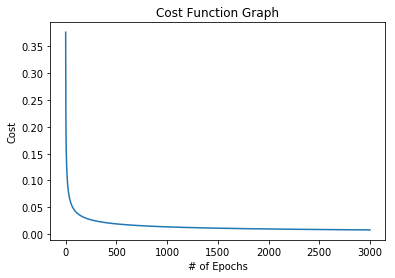

In [227]:
import matplotlib.pyplot as plt 
def plot_graph(J):
    x = np.arange(1,3001) 
    y = J 

    plt.plot(x, y) 

    plt.xlabel('# of Epochs')  
    plt.ylabel('Cost') 

    plt.title('Cost Function Graph') 

    plt.show()
    
plot_graph(J_BGD)

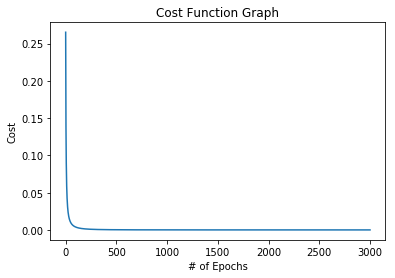

In [228]:
plot_graph(J_SGD)

In [229]:
print(J_BGD[-1],J_SGD[-1])

0.007801110642743273 4.672369860671627e-06


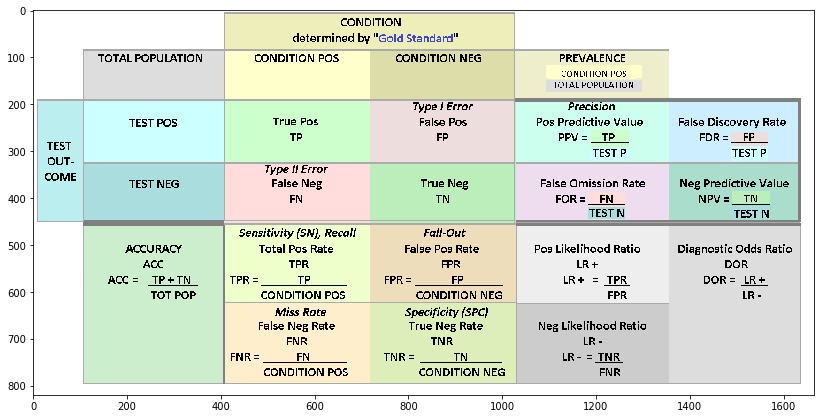

In [230]:
plt.figure(figsize=(14,10))
img = mpimg.imread('Evaluation.PNG')
plt.imshow(img)

In [231]:
df_confusion = evaluation(X_Test, Y_Test, W_BGD)

Actual,0,1,All
Predicted,,,
0,12487,47,12534
1,13,12453,12466
All,12500,12500,25000


,Values
True Positives,12453
True Negatives,12487
False Positives,13
False Negatives,47


,Values
Accuracy,0.997600
Precision,0.998957
Recall,0.996240
F1-Score,0.997597


In [232]:
df_confusion = evaluation(X_Test, Y_Test, W_SGD)

Actual,0,1,All
Predicted,,,
0,12487,45,12532
1,13,12455,12468
All,12500,12500,25000


,Values
True Positives,12455
True Negatives,12487
False Positives,13
False Negatives,45


,Values
Accuracy,0.997680
Precision,0.998957
Recall,0.996400
F1-Score,0.997677


In [233]:
W_SGD

array([ 19.88866178,   2.70781605,   7.561571  , -19.61492001,
        -0.15298829,   0.18442954])

In [234]:
W_BGD

array([ 19.90171036,   2.78793804,   7.49938125, -19.62871352,
        -0.15314955,   0.18437142])